# OkCupid Date-A-Scientist

## Introduction

In this project, we'll be using machine learning models to make different types of predictions based on a dataset from OkCupid. The `profiles.csv` file included in the project contains the personal information of nearly 60,000 users. This information will be explored, cleaned, and later used to train machine learning models which will attempt to place users in a particular class. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data exploration

### Initial exploration

To begin, we'll look at some basic information in this dataset, including:
- The first few rows of the table
- The distinct columns and their types
- How many total rows we have
- Where, if anywhere, there may be values missing

In [2]:
df = pd.read_csv("profiles.csv")
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
print(df.dtypes)
print("Total amount of rows: {0}".format(len(df)))
print("Unique values in 'speaks' column: {0}".format(df['speaks'].nunique()))

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object
Total amount of rows: 59946
Unique values in 'speaks' column: 7647


The first few rows indicate that this data needs considerable tidying. For starters, the "essays" that the users write about themselves contain HTML tags that would need to be removed in order to be processed in any meaningful way. Secondly, certain columns such as 'religion' or 'sign' include what could be two potential features. We have the sign or religion itself, and how seriously the person adheres to astrology or their faith. 

This is important when finding potential compability as we wouldn't necessarily want to match someone who strictly adheres to their faith with someone who isn't very serious about it.

Another potential problem could be the 'speaks' column, as it has over 7000 unique values. This is because there's a large number of potential combinations, as well as some humorous additions to the column (such as "c++"). We may only want to consider languages that the user has stated they're fluent in.

One last thing we can check before actually beginning to make changes to these columns is where there may be any `NaN` values.

In [4]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

Simply dropping rows that have `NaN` values would not really be feasible for this dataset. For instance, `offspring` has over 35,000 `NaN` values! That's more than half the dataset that would get removed by simply dropping rows where `NaN` values are found in that column. Instead, the approach we'll take is simply split up some of the features based on what we want to analyze, and then work to remove any `NaN` values that we may find within those features.

## Cleaning the data

One of the first things we can do is remove HTML tags, line break characters or other special characters that break the text up and make it more difficult to read and process. The most common ones that are evident immediately are line breaks `\n` and `<br />.` Other ones that can be seen are `&amp;` denoting an ampersand and `&rsquo;` denoting an apostrophe. 

In [5]:
df.replace(r"<[^<]+?>", " ", regex=True, inplace=True)
df.replace(r"\n", " ", regex=True, inplace=True)
df.replace(r"&amp;", "&", regex=True, inplace=True)
df.replace(r"&rsquo;", "'", regex=True, inplace=True)
df.head(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me: i would love to think that i was ...,currently working as an international agent fo...,making people laugh. ranting about a good sal...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


Just looking at one row we can already tell the data's more readable. The next step is to combine all essays into a sort of user "biography." We'll create a `bio` column, which will be the sum of all the essays for that user. A potential problem here would be any essay that the user chose not to fill out, thus resulting in a `NaN` value. We'll use `fillna()` to simply turn that into whitespace, which we will then strip away to avoid excess whitespace resulting from multiple blank "essays" in a row.

In [6]:
essays_list = ["essay" + str(i) for i in range(0,10)]
df['bio'] = df[essays_list].apply(lambda x: x + ' ').fillna(' ').sum(axis=1)
df['bio'].replace(r"\s+", " ", regex=True, inplace=True)
print(df['bio'][3])
print(df['sign'][2])
print(df['offspring'][3])

i work in a library and go to school. . . reading things written by old dead people playing synthesizers and organizing books according to the library of congress classification system socially awkward but i do my best bataille, celine, beckett. . . lynch, jarmusch, r.w. fassbender. . . twin peaks & fishing w/ john joy division, throbbing gristle, cabaret voltaire. . . vegetarian pho and coffee cats and german philosophy you feel so inclined. 
pisces but it doesn't matter
doesn't want kids


Perfect! We can now see a fully cleaned `bio`, along with cleaned `sign` and `offspring` columns.

## Using Machine Learning to Predict Zodiac Sign

If we check back to our table containing `NaN` values, we can see that `sign` has around 11,000 missing values. Using features that describe a user's habits and what they do for a living, we could potentially predict someone's zodiac sign in order to fill in the missing values. We'll want to do two things before we actually begin training an ML model on our data: select the classifiers we'll be using, and select a subet of data that we'll train those models on. 

Finally, we're only interested in the sign itself, not whether or not the user in question is a fervent believer in astrology. We can see after cleaning the data that some rows include things like **"but it doesn't matter"** in conjunction with a user's sign. We'll be removing this.

### Creating a Subset of Data

The features we'll use to train our model will be:
- A cleaned `sign` column, which shows only the user's sign and nothing else
- How often the person drinks
- How often the person uses drugs
- How often the person smokes
- The person's diet
- The person's body type
- The person's job
- The person's pet preference

In [7]:
signs_features = ['sign', 'drinks', 'drugs', 'smokes', 'diet', 'body_type', 'job', 'pets']
signs_df = df[signs_features].dropna()
signs_df['sign'] = signs_df['sign'].apply(lambda str: str.split()[0])
print(len(signs_df))
signs_df.head()

15821


,sign,drinks,drugs,smokes,diet,body_type,job,pets
0,gemini,socially,never,sometimes,strictly anything,a little extra,transportation,likes dogs and likes cats
1,cancer,often,sometimes,no,mostly other,average,hospitality / travel,likes dogs and likes cats
7,sagittarius,socially,never,no,mostly anything,average,artistic / musical / writer,likes dogs and likes cats
9,cancer,not at all,never,no,mostly anything,athletic,student,likes dogs and likes cats
11,leo,socially,never,no,mostly anything,average,banking / financial / real estate,likes cats


We have around 15,000 rows of data to work with here. However, our models will not be able to understand what drinking "socially" vs "often" means, and so we need to turn this data into something readable by a machine learning model.

### Creating dummy variables
To achieve the aforementioned goal, we'll use `get_dummies()` to turn each column into several that contain binary values our model can learn from. 

In [8]:
for feature in signs_features[1:]:
    signs_df = pd.get_dummies(signs_df, columns=[feature], prefix=[feature])
signs_df.head()

,sign,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,...,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats
0,gemini,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,cancer,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,sagittarius,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,cancer,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11,leo,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


This is what our data looks like now. We have 81 columns to work with, each describing either a habit, lifestyle choice, work, or pet preference. Finally, it's important to check for data imbalance. If one label is more represented over others, it will be a favored choice, increasing accuracy for the classifier without necessarily being any more accurate. In this case, we can see that most labels have around the same amount of values. 

However, had this not been the case, we could always attempt to score the model on **precision, recall, or F1-score**, instead.

In [9]:
signs_df['sign'].value_counts()

virgo          1436
leo            1414
cancer         1389
gemini         1378
taurus         1341
libra          1325
scorpio        1323
aries          1280
pisces         1268
sagittarius    1268
aquarius       1231
capricorn      1168
Name: sign, dtype: int64

### Splitting the data

The next step will be to split the data into a training set and a testing set. The default parameters are 80% training data, and 20% testing data, which we will keep in this particular case.

In [10]:
from sklearn.model_selection import train_test_split

data = signs_df.iloc[:, 1:]
labels = signs_df['sign'].values

signs_train_data, signs_test_data, signs_train_labels, signs_test_labels = train_test_split(data, labels, random_state=0)

### Selecting Our Models

There's multiple ways to predict data in our current format. In this project, we'll be using a Decision Tree, and a K-Nearest Neighbors model to try to classify people into their correct zodiac signs using the features in `signs_df`. However, could it be possible to accurately predict someone's zodiac sign based on the way they describe themselves and what they're looking for? We'll attempt to train a Naive-Bayes classifier using the `bio` column we created earlier, which is made up of all combined essays, to predict zodiac sign, as well. 

Let's import the models we'll be using.

In [11]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

### Evaluating and Testing Our Models

We'll also use two different functions to evaluate our models. One will print a classification report that includes a model's **precision, recall, and F1-score.** The other will use a K-FOLD Cross Validation score, testing the model K times(default 5), and returning a score each time. We'll average those score to get an overall sense of that model's accuracy.

Our models will create predictions based on the **test** set, not the **training** set. These predictions are then what we'll use to evaluate a model's accuracy.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

### Training a Decision Tree

We'll start with a decision tree. We'll train it using our training data and labels, and then make predictions using the test data. 

In [13]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(signs_train_data, signs_train_labels)
tree_predictions = tree_clf.predict(signs_test_data)

### Analyzing the Decision Tree
It's important to visualize and understand just how accurate these predictions might be. We'll look at a confusion matrix and then use `cross_val_score()` to get a numeric value we can interpret more easily.

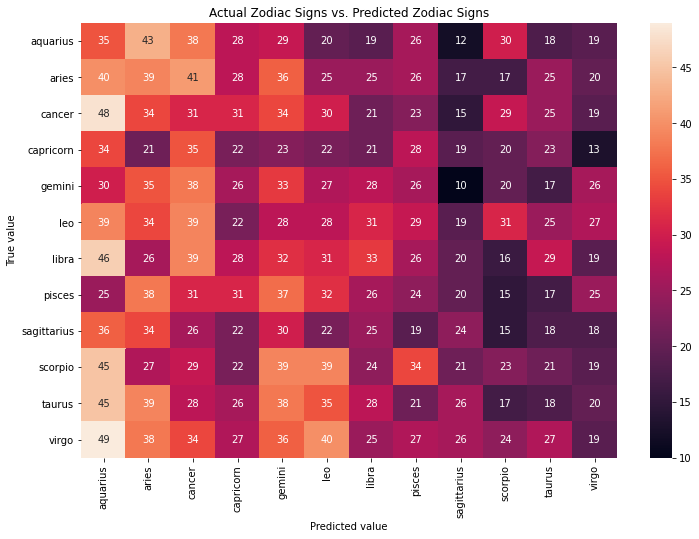

In [123]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(signs_test_labels, tree_predictions)

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d")
plt.title("Actual Zodiac Signs vs. Predicted Zodiac Signs")
ax.set_xlabel("Predicted value")
ax.set_ylabel("True value")
ax.set_xticklabels(tree_clf.classes_, rotation=90)
ax.set_yticklabels(tree_clf.classes_, rotation=360)
plt.show()

In [15]:
tree_score = cross_val_score(tree_clf, signs_test_data, signs_test_labels).mean() * 100
print(classification_report(signs_test_labels, tree_predictions))
print("Accuracy: {:.2f}%".format(tree_score))
print("Tree depth: {0}".format(tree_clf.get_depth()))

              precision    recall  f1-score   support

    aquarius       0.07      0.11      0.09       317
       aries       0.10      0.12      0.10       339
      cancer       0.08      0.09      0.08       340
   capricorn       0.07      0.08      0.07       281
      gemini       0.08      0.10      0.09       316
         leo       0.08      0.08      0.08       352
       libra       0.11      0.10      0.10       345
      pisces       0.08      0.07      0.08       321
 sagittarius       0.10      0.08      0.09       289
     scorpio       0.09      0.07      0.08       343
      taurus       0.07      0.05      0.06       341
       virgo       0.08      0.05      0.06       372

    accuracy                           0.08      3956
   macro avg       0.08      0.08      0.08      3956
weighted avg       0.08      0.08      0.08      3956

Accuracy: 8.92%
Tree depth: 60


### Evaluating the Decision Tree Model

Unfortunately, the results of the predictions made by the decision tree don't seem to indicate that it's very accurate. At around **8%** accuracy, it'll accurately predict a zodiac sign based on the given features roughly 1 out of 12 times, which is the probability of a person randomly picking a zodiac sign and getting it correct. That means that our decision tree model is, sadly, no better than a human at correctly predicting zodiac sign based on these features. Tweaking the max_depth of the tree achieves very little as far as accuracy goes. By default, it reaches a depth of **60**. 

### Training a K-Nearest Neighbors Classifier

This model will look at the same features, creating centroids that will be used to create classifications for our data. We can then predict how future data will be classified by seeing how close to these centroids it falls. 

In [124]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(signs_train_data, signs_train_labels)
knn_predictions = knn_clf.predict(signs_test_data)
knn_score = cross_val_score(knn_clf, signs_test_data, signs_test_labels).mean() * 100
print(classification_report(signs_test_labels, knn_predictions))
print("Accuracy: {:.2f}%".format(knn_score))

              precision    recall  f1-score   support

    aquarius       0.07      0.19      0.10       317
       aries       0.09      0.16      0.12       339
      cancer       0.09      0.14      0.11       340
   capricorn       0.08      0.09      0.08       281
      gemini       0.09      0.10      0.10       316
         leo       0.09      0.07      0.08       352
       libra       0.11      0.06      0.07       345
      pisces       0.11      0.06      0.08       321
 sagittarius       0.08      0.06      0.07       289
     scorpio       0.10      0.05      0.07       343
      taurus       0.13      0.08      0.10       341
       virgo       0.11      0.05      0.07       372

    accuracy                           0.09      3956
   macro avg       0.10      0.09      0.09      3956
weighted avg       0.10      0.09      0.09      3956

Accuracy: 7.96%


### Tweaking the K-Nearest Neighbors Classifier

Our initial test with K-Nearest Neighbors doesn't show much promise either. In this case we have a little under **8%** success rate in predicting zodiac sign using these features. This is still not better than random chance. However, we may be able to optimize the amount of K-Neighbors this model uses, trying to find a value that'll improve its accuracy. We'll iterate through several values for `n_neighbors` and create a list containing averaged score values, as well as storing our potential best K value and its corresponding score.

In [17]:
accuracies = []
best_accuracy = 0
best_k = 0
for i in range(1,21):
    test_knn = KNeighborsClassifier(n_neighbors=i)
    test_knn.fit(signs_train_data, signs_train_labels)
    score = cross_val_score(test_knn, signs_test_data, signs_test_labels).mean() * 100
    accuracies.append(score)
    if score > best_accuracy:
        best_accuracy = score
        best_k = i

Now let's visualize the results of this loop.

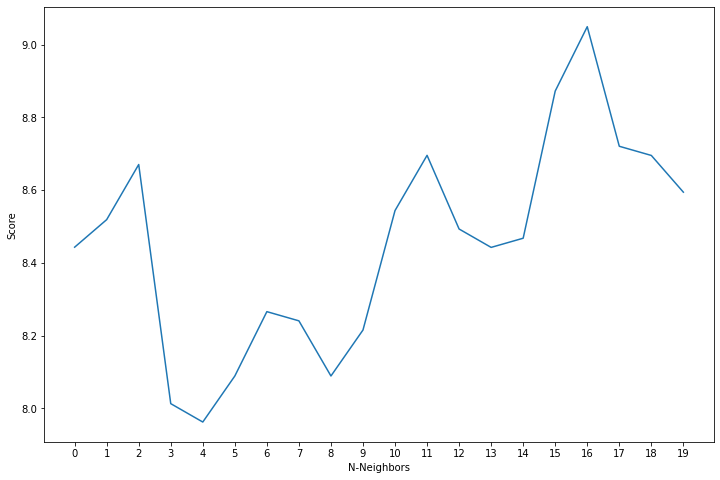

In [125]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel("N-Neighbors")
plt.ylabel("Score")
ax.set_xticks(range(len(accuracies)))
plt.show()

### Evaluating the K-Nearest Neighbors Classifier

Unfortunately, the highest average score was around **9%**, peaking at a K value of **16**. It would be hard to justify looping through more values, as the amount of change seen is minimal and appears to once again drop after `n_neighbors=16`. Sadly, K-Nearest Neighbors will not help us assign zodiac signs in an accurate way, either.

### Training a Naive-Bayes Classifier

Finally, would it be possible to predict a person's zodiac sign based on the descriptions given in their profile essays? We'll use the `bio` column that was created earlier in the project. This will be a very large subset of data, as the only features we're interested in are the `bio` and `sign` features. First, we'll make a new dataframe with the features we need.

In [19]:
bio_df = df[['bio', 'sign']].dropna()
bio_df['sign'] = bio_df['sign'].apply(lambda str: str.split()[0])
print(len(bio_df))
bio_df.head()

48890


,bio,sign
0,about me: i would love to think that i was som...,gemini
1,i am a chef: this is what that means. 1. i am ...,cancer
2,"i'm not ashamed of much, but writing public te...",pisces
3,i work in a library and go to school. . . read...,pisces
4,hey how's it going? currently vague on the pro...,aquarius


Seeing as we have almost 50,000 values training could take a minute or two. For training our model we'll be using a `Pipeline`. This `Pipeline` will use a `CountVectorizer` to create a term-document matrix from the training data, then a Tf-idf matrix using `TfidfTransformer`, which will then be used to train `MultinomialNB` in order to create predictions. 

In [20]:
nb_clf = Pipeline([
    ('counter', CountVectorizer(stop_words='english')),
    ('transformer', TfidfTransformer()),
    ('clf', MultinomialNB())
])

bio_data = bio_df['bio'].values
bio_labels = bio_df['sign'].values


bio_train_data, bio_test_data, bio_train_labels, bio_test_labels = train_test_split(bio_data, bio_labels)
nb_clf.fit(bio_train_data, bio_train_labels)
nb_predictions = nb_clf.predict(bio_test_data)
print("Accuracy: {:.2f}%".format(np.mean(nb_predictions == bio_test_labels) * 100))

Accuracy: 8.68%


### Analyzing Naive-Bayes Classifier

Much like the Decision Tree and K-Nearest Neighbors, it's not very accurate (once again hovering around **8%**). It stands about the same chance at correctly predicting a zodiac sign as it would by picking it at random.

### Visualizing Profile Data

Our Naive-Bayes classifier may not have been great at predicting a person's zodiac sign, but we still have interesting text data we can visualize inside the `bio` column. Let's try to see what some popular terms are in people's profiles. In order to do that, we'll need to train the `CountVectorizer` again, however, due to the size of the data, we'll only use 5% of the dataset to do this.

In [191]:
bio_subset, _, _, _ = train_test_split(bio_data, bio_labels, train_size=.05, random_state=10)
word_array = nb_clf.named_steps['counter'].fit_transform(bio_subset).toarray()
word_counts = word_array.sum(axis=0)
words = np.array(nb_clf.named_steps['counter'].get_feature_names())
word_dict = dict(zip(words,word_counts))

### Creating a Word Cloud
There's a `WordCloud` library we can use to visualize term frequency in a very simple way. After combining our term frequency matrix with the feature names into a dictionary that contains each word as the `key` and their total counts as a `value`. With this dictionary, we can use this to create a word cloud.

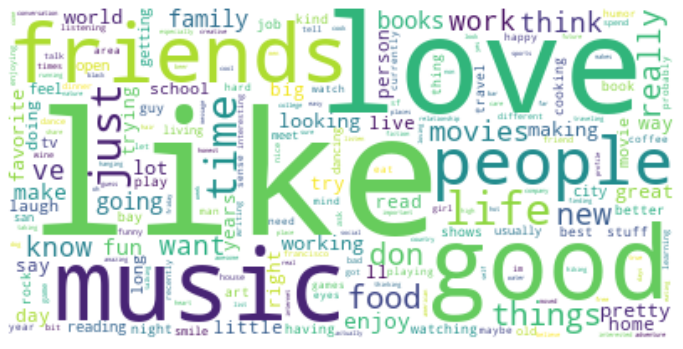

In [192]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white').fit_words(word_dict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")

### Analyzing the Word Cloud
It's no surprise that people would focus a lot on positive words when either describing themselves or their potential partner. Words like **"love"** and **"like"** happen very frequently, and are likely used to describe a user's habits. Certain activities like **music** are mentioned more often than **movies** or **books**.

## Zodiac Sign Prediction: Conclusion

Coming back to our zodiac sign predictions, our models were, unfortunately, not very accurate when it came to predicting a person's zodiac sign based on the selected features. Assigning a number to each sign then rolling two fair dice to predict someone's sign will have around the same success rate as our models.

## Predicting Whether or Not Someone Wants Children

Another opportunity to fill in a lot of missing data exists in the `offspring` column. As previously mentioned, there are nearly 35,000 missing values here. Often people want to wait until they're at a very comfortable point in their life or at a certain age before deciding to have children. Could we use features such as education, job and certain lifestyle choices (smoking, drinking) to predict whether someone might want children or not?

Let's start by seeing what the unique values for the `offspring` column are.

In [126]:
print(df['offspring'].unique())

["doesn't have kids, but might want them" nan "doesn't want kids"
 "doesn't have kids, but wants them" "doesn't have kids" 'wants kids'
 'has a kid' 'has kids' "doesn't have kids, and doesn't want any"
 "has kids, but doesn't want more" "has a kid, but doesn't want more"
 'has a kid, and wants more' 'has kids, and might want more'
 'might want kids' 'has a kid, and might want more'
 'has kids, and wants more']


### Subsetting the Data

We're not going to consider any qualifiers other than "wants" or "doesn't want" for these predictions. Answers which only indicate that someone "has" kids and not whether or not they "want" them will be excluded. Additionally, people who are currently uncertain will also be excluded from the test. We're primarily interested in creating a subset of people who know that they either want or don't want children.

For this reason, we'll begin by creating a list of the values we want based on the above list of unique values.

We also want to decide what features we'll use to make these predictions. In this case we'll go with:
- Education
- Job
- Whether the person drinks or not
- Whether the person smokes or not
- Whether the person uses drugs or not
- Age
- Whether they want or don't want children

In [129]:
val_to_keep = ["doesn't want kids", "doesn't have kids, but wants them", \
              "wants kids", "doesn't have kids and doesn't want any", \
              "has kids, but doesn't want more", "has a kid, but doesn't want more", \
              "has a kid, and wants more", "has kids, and wants more"]
children_features = ['offspring', 'education', 'job', 'drinks', 'smokes', 'drugs', 'age', 'wants_children']

Next, we'll actually subset the data we want. 

In [135]:
children_df = df[children_features[:-1]][df['offspring'].isin(val_to_keep)].dropna()
children_df['wants_children'] = children_df['offspring'].apply(lambda x: 0 if ("doesn't want" in x) \
                                                                else (1 if "want" in x else None))
children_df['age'] = children_df['age'].apply(lambda x: (x-children_df['age'].min()) / \
                                             (children_df['age'].max()-children_df['age'].min()))
children_df['wants_children'] = children_df['wants_children'].astype(int)
children_df = children_df.drop(columns=['offspring'])
print(len(children_df))
children_df.head(5)

5323


,education,job,drinks,smokes,drugs,age,wants_children
7,graduated from college/university,artistic / musical / writer,socially,no,never,0.254902,1
14,working on college/university,other,socially,no,never,0.215686,1
25,graduated from college/university,medicine / health,rarely,no,never,0.196078,1
31,graduated from college/university,science / tech / engineering,socially,no,never,0.176471,1
33,working on college/university,hospitality / travel,socially,no,never,0.039216,0


Using the above code, we have a dataframe that includes rows for people who want/don't want children. Any rows that include `NaN` values or any value that doesn't include the words **"doesn't want"** or **"want"** are eliminated. Additionally, we will need to normalize our `age` column.

### Creating Dummy Variables

As with the zodiac predictions, we'll want to split our existing features into dummy variables that our classifiers will be able to interpret more easily. The exception will naturally be `wants_children` and `age` as these values already exist between 0 and 1.

In [136]:
for feature in children_features[1:-2]:
    children_df = pd.get_dummies(children_df, columns=[feature], prefix=[feature])
children_df.head()

,age,wants_children,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,...,drinks_socially,drinks_very often,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,drugs_never,drugs_often,drugs_sometimes
7,0.254902,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
14,0.215686,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
25,0.196078,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
31,0.176471,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
33,0.039216,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


Our data now looks like this. We have **69** columns we can work with. One final step is to check label equality. Once again, our data is mostly balanced. This creates an optimal situation for training data as, presumably, one label won't be favored over another.

In [163]:
children_df['wants_children'].value_counts()

1    2766
0    2557
Name: wants_children, dtype: int64

### Splitting Our Data

No we will split our data into a training set and a test set once more. We'll use the test set to create predictions and evaluate our model.

In [160]:
data1 = children_df.iloc[:, 2:]
data2 = children_df.iloc[:, 0]
children_data = pd.concat([data1, data2], axis=1)
children_labels = children_df['wants_children'].values

children_train_data, children_test_data, children_train_labels, children_test_labels = train_test_split(children_data, \
                                                                                                       children_labels, \
                                                                                                       random_state=0)

### Selecting Our Models

For this test, we'll try a Logistic Regression model first. Seeing as our dependent variable is a binary choice of wants/doesn't want, it makes sense to use this type of model to predict classifications. We'll also attempt to once again use a K-Nearest Neighbors classifier. Let's import the Logistic Regression model, as we already have the KNN model imported from a previous test.

In [27]:
from sklearn.linear_model import LogisticRegression

### Training a Logistic Regression Model

With our data properly split, let's begin training our LR model.

In [161]:
lr_clf = LogisticRegression()
lr_clf.fit(children_train_data, children_train_labels)
lr_predictions = lr_clf.predict(children_test_data)
print(classification_report(children_test_labels, lr_predictions))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       623
           1       0.74      0.80      0.77       708

    accuracy                           0.75      1331
   macro avg       0.75      0.74      0.74      1331
weighted avg       0.75      0.75      0.74      1331



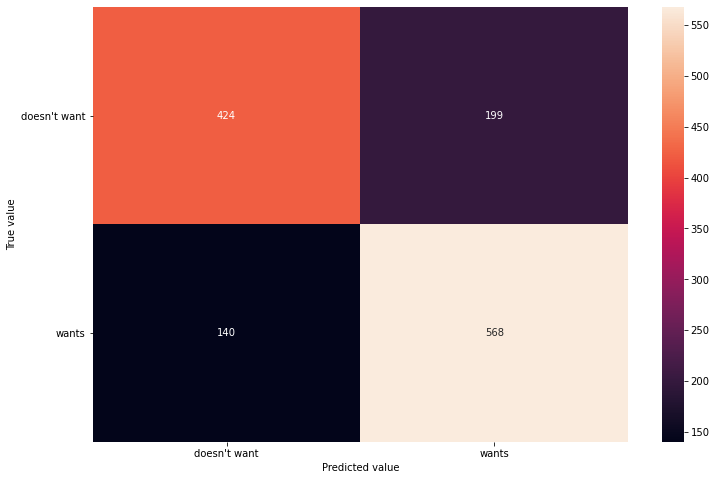

In [162]:
children_cm = confusion_matrix(children_test_labels, lr_predictions)

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(children_cm, annot=True, ax = ax,fmt="d")
ax.set_xlabel("Predicted value")
ax.set_ylabel("True value")
ax.set_xticklabels(["doesn't want", "wants"])
ax.set_yticklabels(["doesn't want", "wants"], rotation=360)
plt.show()

### Evaluating the Logistic Regression Model

We're looking at around **75%** accuracy, which isn't bad at all! Using these features we could make some fairly accurate predictions as to whether the person will want children or not.

### Training the K-Nearest Neighbor Model

Next up, we'll see if the K-Nearest Neighbor model can do better. It's likely that it will suffer from a similar problem of over-guessing "wants."

In [164]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(children_train_data, children_train_labels)
knn_child_predictions = knn_clf.predict(children_test_data)
print(classification_report(children_test_labels, knn_child_predictions))

              precision    recall  f1-score   support

           0       0.70      0.63      0.67       623
           1       0.70      0.76      0.73       708

    accuracy                           0.70      1331
   macro avg       0.70      0.70      0.70      1331
weighted avg       0.70      0.70      0.70      1331



### Evaluating the K-Nearest Neighbor Model

Unfortunately, it fared slightly worse at around **70%** accuracy. It seems to be slightly better at detecting when someone **wants** children rather than when they **don't**. 

## Children Prediction: Conclusion


It would seem that someone's career, education, and age are only part of the equation. While they can be accurate predictors of when someone **wants** children, it's evident that these same features are slightly worse at detecting when someone **doesn't**.

Further research would be required, and other features may need to be added to the dataset. What other factors could be decisive in predicting when someone **doesn't** want a child?